<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Ali Salesi
### Student Number : 99105334
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')


# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [2]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            'W': initializer(dim_in, dim_out),
            'b': np.zeros(dim_out),
            'reg': alpha if reg else 0,
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x, mode='train'):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        y = x @ self.params['W'].T + self.params['b']
        self.cache['x'] = x

        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        W = self.params['W']
        b = self.params['b']
        alpha = self.params['reg']
        grad_reg_w = 2 * alpha * W
        grad_reg_b = 2 * alpha * b
        grad_b = np.sum(upstream, axis=0)
        grad_w = upstream.T @ self.cache['x']
        grad_x = upstream @ W

        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg_w,
            'reg_b': grad_reg_b,
        }


In [3]:
# sanity check, output must be from o(e-5)
def initializer(x, y): return np.random.normal(size=(y, x))


linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)


Gradient of loss w.r.t output:
[[3.18729308e-01 6.35418886e-01 5.84348911e-01 1.70777582e-01
  1.13952079e-01 5.97333947e-01 6.41023272e-01 2.97685403e-01
  3.62322145e-01 9.41634884e-01]
 [1.05513109e-01 4.22020634e-02 5.53215966e-01 3.13484416e-02
  8.29454287e-01 7.15574953e-01 4.42145504e-01 8.99430927e-01
  1.53584044e-01 1.88866178e-02]
 [9.37386366e-01 7.03634971e-01 2.56157492e-01 5.24058757e-01
  7.85175681e-02 8.28017020e-01 8.21281555e-01 6.83909700e-01
  4.34181095e-01 8.86475205e-01]
 [2.63299120e-01 9.70953530e-01 8.46265622e-01 9.90434513e-01
  1.73658259e-01 9.71933315e-01 6.34211809e-01 3.03862882e-01
  6.78354678e-01 6.60178100e-01]
 [8.04685935e-01 4.20698121e-01 3.42478692e-01 4.12587442e-01
  1.55399165e-01 1.28728079e-01 5.09123334e-01 7.62427880e-01
  2.33540369e-01 8.33297132e-01]
 [2.72596612e-01 3.73485657e-01 9.70336866e-02 6.28173944e-01
  9.84142587e-01 6.34211959e-01 1.26451174e-01 3.28624262e-01
  2.66207221e-01 3.39956159e-01]
 [5.17769753e-01 6.82544342

#### ReLU Layer (5 Points)

In [4]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x, mode='train'):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        y = np.where(x > 0, x, 0)
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        grad_x = upstream * np.where(self.cache['x'] > 0, 1, 0)

        self.grads['x'] = grad_x


In [5]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)


Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [6]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    return np.logaddexp.reduce(array, axis=axis)


In [7]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x, mode='train'):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        self.cache['x'] = x
        y = x - logsumexp(x).reshape(x.shape[0], 1)
        self.cache['y'] = y

        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        y = np.exp(self.cache['y'])
        grad_x = upstream - y * np.sum(upstream, axis=1).reshape(y.shape[0], 1)

        self.grads['x'] = grad_x


In [8]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)


Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

In [9]:
class BatchNorm(Module):
    def __init__(self, dim_in, momentum=0.99, eps=1e-3):
        self.cache = dict()
        self.grads = dict()
        self.momentum = momentum
        self.eps = eps
        self.dim_in = dim_in
        self.params = {
            'gamma': np.ones(dim_in),
            'beta': np.zeros(dim_in),
            'running_mean': np.zeros(dim_in),
            'running_var': np.zeros(dim_in),
        }

    def _forward(self, x, mode='train'):
        """
        get x and calculate batchnorm of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log batchnorm of x with shape (b,m)
        """
        self.cache['x'] = x
        if mode == 'train':
            mean = np.mean(x, axis=0)
            x_mu = x - mean
            var = np.var(x, axis=0)
            ivar = 1. / np.sqrt(var + self.eps)
            x_hat = x_mu * ivar
            y = self.params['gamma'] * x_hat + self.params['beta']
            self.cache['x'] = x
            self.cache['mean'] = mean
            self.cache['var'] = var
            self.params['running_mean'] = self.momentum * self.params['running_mean'] + (1 - self.momentum) * mean
            self.params['running_var'] = self.momentum * self.params['running_var'] + (1 - self.momentum) * var
        else:
            y = self.params['gamma'] * (x - self.params['running_mean']) / np.sqrt(
                self.params['running_var'] + self.eps) + self.params['beta']

        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with shape (b,m)
        """
        x = self.cache['x']
        x_mu = x - self.cache['mean']
        var = self.cache['var']
        svar = np.sqrt(var + self.eps)
        ivar = 1. / svar
        x_hat = x_mu * ivar
        grad_beta = np.sum(upstream, axis=0)

        grad_gamma = np.sum(upstream * x_hat, axis=0)

        N, D = upstream.shape
        dxhat = upstream * self.params['gamma']
        dxmu1 = dxhat * ivar
        dxmu2 = -x_mu / N * np.ones((N, D)) * ivar * 1. / (var + self.eps) * np.sum(dxhat*x_mu, axis=0)
        dx1 = (dxmu1 + dxmu2)
        dx2 = np.ones((N, D)) * (-np.sum(dx1, axis=0) / N)
        grad_x = dx1 + dx2

        self.grads['x'] = grad_x
        self.grads['gamma'] = grad_gamma
        self.grads['beta'] = grad_beta


In [10]:
class Dropout(Module):
    def __init__(self, prob=0.5):
        self.cache = dict()
        self.grads = dict()
        self.prob = prob

    def _forward(self, x, mode='train'):
        """
        get x and calculate dropout of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : dropout of x with shape (b,m)
        """
        if mode == 'train':
            mask = np.random.uniform(size=x.shape[1])
            mask = np.where(mask < self.prob, True, False)
            self.cache['mask'] = mask
            y = x.T
            y[mask] = np.zeros(x.shape[0])
            return y.T
        else:
            return x

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with shape (b,m)
        """
        mask = self.cache['mask']
        grad_x = upstream.T
        grad_x[mask] = np.zeros(upstream.shape[0])
        self.grads['x'] = grad_x.T


## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [11]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x, mode='train'):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        for layer in self.layers:
            x = layer._forward(x, mode=mode)
        return x

    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        for layer in self.layers[::-1]:
            layer.backward(upstream)
            upstream = layer.grads['x']
        return upstream

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        parametric_layers = []
        for layer in self.layers:
            if hasattr(layer, 'params'):
                parametric_layers.append(layer)
        return parametric_layers


## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [12]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        self.cache['x'] = logprobs
        new_targets = np.zeros(logprobs.shape)
        for i, l in enumerate(targets):
            new_targets[i][l] = 1
        self.cache['targets'] = new_targets
        y = -np.sum(new_targets * logprobs, axis=1) / targets.shape[0]

        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        grad_scores = upstream * (-self.cache['targets']) / self.cache['targets'].shape[0]

        self.grads['x'] = grad_scores


In [13]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)


Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.1 -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]]
Relative error of delta-loss:
1.418949593240605e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [14]:
class Optimizer():
    """
    Our main optimization class.

    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
            'adam': self._adam,
        }
        self.momentum_changes = dict([])

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self, epoch):
        """
        Perform sgd update on all parameters of layers
        """
        for layer in self.layers:
            if 'W' in layer.params:
                layer.params['W'] += -self.lr(epoch) * (layer.grads['W'] + layer.grads['reg'])
                layer.params['b'] += -self.lr(epoch) * (layer.grads['b'] + layer.grads['reg_b'])
            elif 'gamma' in layer.params:
                layer.params['gamma'] += -self.lr(epoch) * layer.grads['gamma']
                layer.params['beta'] += -self.lr(epoch) * layer.grads['beta']
        
    
    def __momentum_change(self, momentum, key, value):
        change = momentum * self.momentum_changes.get(key, value) + (1 - momentum) * (value)
        self.momentum_changes[key] = change
        return change
    
    def __adam_change(self, epoch, beta1, beta2, eps, key, value):
        m = self.__momentum_change(beta1, (key[0], 'm_' + key[1]), value)
        v = self.__momentum_change(beta2, (key[0], 'v_' + key[1]), value ** 2)
        m_hat = m / (1 - np.power(beta1, epoch))
        v_hat = v / (1 - np.power(beta2, epoch))
        return m_hat / (np.sqrt(v_hat) + eps)

    def _momentum(self, epoch, momentum=0.9):
        """
        Perform momentum update on all parameters of layers
        """
        for i, layer in enumerate(self.layers):
            if 'W' in layer.params:
                layer.params['W'] -= self.lr(epoch) * self.__momentum_change(momentum, (i, 'W'), layer.grads['W'] + layer.grads['reg'])
                layer.params['b'] -= self.lr(epoch) * self.__momentum_change(momentum, (i, 'b'), layer.grads['b'] + layer.grads['reg_b'])
            elif 'gamma' in layer.params:
                layer.params['gamma'] -= self.lr(epoch) * self.__momentum_change(momentum, (i, 'gamma'), layer.grads['gamma'])
                layer.params['beta'] -= self.lr(epoch) * self.__momentum_change(momentum, (i, 'beta'), layer.grads['beta'])
    
    def _adam(self, epoch, beta1=0.9, beta2=0.999, eps=1e-8):
        for i, layer in enumerate(self.layers):
            if 'W' in layer.params:
                layer.params['W'] -= self.lr(epoch) * self.__adam_change(epoch+1, beta1, beta2, eps, (i, 'W'), layer.grads['W'] + layer.grads['reg'])
                layer.params['b'] -= self.lr(epoch) * self.__adam_change(epoch+1, beta1, beta2, eps, (i, 'b'), layer.grads['b'] + layer.grads['reg_b'])
            elif 'gamma' in layer.params:
                layer.params['gamma'] -= self.lr(epoch) * self.__adam_change(epoch+1, beta1, beta2, eps, (i, 'gamma'), layer.grads['gamma'])
                layer.params['beta'] -= self.lr(epoch) * self.__adam_change(epoch+1, beta1, beta2, eps, (i, 'beta'), layer.grads['beta'])


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [15]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!./cifar10_downloader.bash


'.' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [17]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
val_ind = np.random.choice(4000, size=550, replace=False)
mask = np.zeros(4000, dtype=bool)
mask[val_ind] = True
data['X_val'] = data['X_train'][mask]
data['Y_val'] = data['Y_train'][mask]
data['X_train'] = data['X_train'][~mask]
data['X_train_flip'] = np.flip(data['X_train'], axis=2)
data['Y_train'] = data['Y_train'][~mask]
##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (3450, 32, 32, 3)
Y_train: (3450,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (550, 32, 32, 3)
Y_val: (550,)
X_train_flip: (3450, 32, 32, 3)


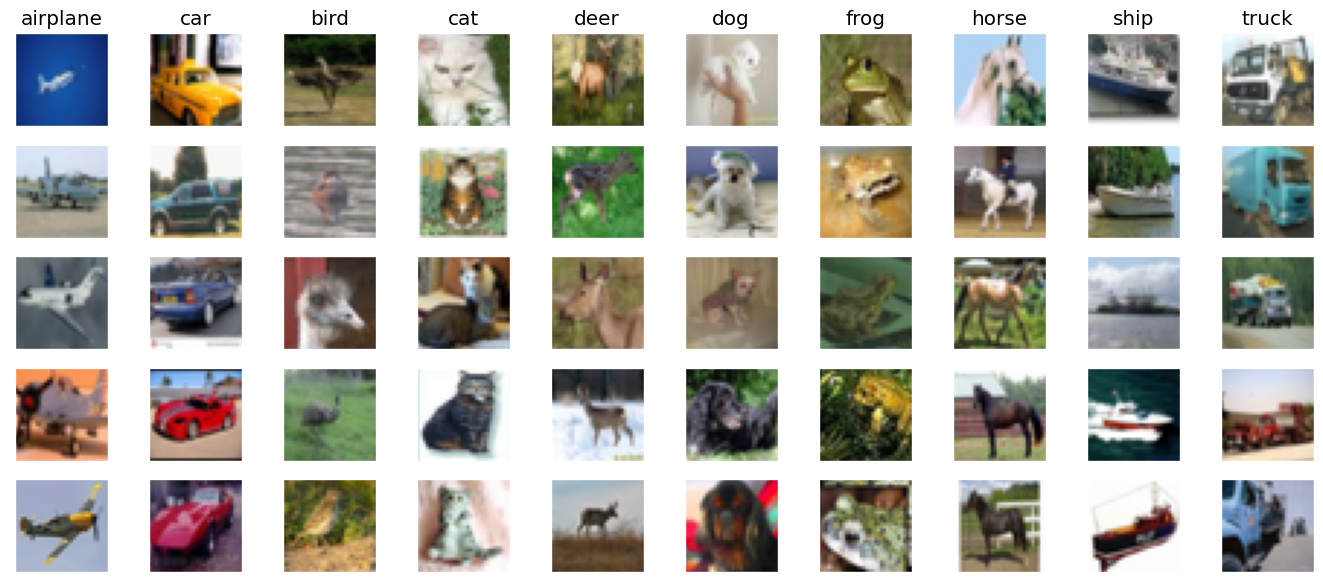

In [18]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
samples = dict([[i, []] for i in range(10)])
for X, Y in zip(data['X_train'], data['Y_train']):
    if len(samples[Y]) < 5:
        samples[Y].append(X)
labels = ['airplane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(17, 7))
for i in range(10):
    for j, X in enumerate(samples[i]):
        fig.add_subplot(5, 10, 10 * j + i + 1)
        plt.imshow(X)
        if j == 0:
            plt.title(labels[i])
        plt.xticks([])
        plt.yticks([])
plt.show()


In [19]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################
for k in data.keys():
    if k[0] == 'Y':
        continue
    data[k] = data[k].transpose(3, 0, 1, 2)
    for i in range(3):
        data[k][i] = (data[k][i] - np.mean(data[k][i])) / np.std(data[k][i])
    data[k] = data[k].transpose(1, 0, 2, 3).reshape(data[k].shape[1], 3072)
#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (3450, 3072)
Y_train: (3450,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (550, 3072)
Y_val: (550,)
X_train_flip: (3450, 3072)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [20]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, dtype):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            dtype : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{dtype}'
        self.y_key = f'Y_{dtype}'
        self.indices = np.arange(dataset[self.x_key].shape[0])
        np.random.shuffle(self.indices)
        self.num_batches = int(
            np.ceil(self.indices.shape[0] / self.batch_size))
        self.indices = np.array_split(self.indices, self.num_batches)

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            if self.x_key == 'X_train':
                x = self.dataset[self.x_key][idx]
                rands = np.random.uniform(size=(idx.shape[0]))
                mask = np.where(rands < 0.36, True, False)
                x[mask] = self.dataset['X_train_flip'][idx][mask]
                x += np.random.normal(size=x.shape, loc=0, scale=0.01)
            else:
                x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [21]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    conf_matrix = np.zeros(conf_matrix.shape)
    for i in range(reals.shape[0]):
        x = reals[i]
        y = preds[i]
        if x == y:
            conf_matrix[x, x] += 1
        else:
            conf_matrix[y, x] += 1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix

    Returns:
        f1 : macro f1 score
    """
    N = confusion_matrix.shape[0]
    pr_matrix = np.zeros((N, 3))
    for i in range(N):
        pr_matrix[i, 0] = confusion_matrix[i, i]
        pr_matrix[i, 1] = np.sum(confusion_matrix[i]) - confusion_matrix[i, i]
        pr_matrix[i, 2] = np.sum(confusion_matrix[:, i]) - confusion_matrix[i, i]
    f_matrix = np.zeros(N)
    for i in range(N):
        total = (2 * pr_matrix[i, 0] + pr_matrix[i, 1] + pr_matrix[i, 2])
        if total > 0:
            f_matrix[i] = (2 * pr_matrix[i, 0]) / total
        else:
            f_matrix[i] = 0
    f1_score = np.mean(f_matrix)

    return f1_score


### Define Model
Define an MLP model to solve classification problem.

In [51]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
def initializer(x, y):
    return np.random.normal(loc=0., scale=np.sqrt(2./y), size=(y, x))


model = MLPModel([
    LinearLayer(3072, 1024, initializer, True, 1e-2),
    BatchNorm(1024),
    Dropout(0.25),
    ReLU(),
    LinearLayer(1024, 512, initializer, True, 5e-3),
    BatchNorm(512),
    Dropout(0.15),
    ReLU(),
    LinearLayer(512, 10, initializer, True, 1e-3),
    LogSoftMax(),
])


In [52]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 240
n_resets = 4
batch_size = 1150


def lr(epoch):
    k_epochs = (n_epochs // n_resets)
    k_epoch = epoch % k_epochs
    k_reset = epoch // k_epochs
    return 0.5 * 0.0025 * (1 + np.cos(k_epoch * np.pi / k_epochs)) * (0.5 ** k_reset)


In [53]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(model.get_parameters(), 'adam', lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size, data, 'train')
val_sampler = RandomSampler(batch_size, data, 'val')
test_sampler = RandomSampler(batch_size, data, 'test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [54]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0
train_str = ''
val_str = ''

with tqdm.tqdm(range(n_epochs), total=n_epochs) as pbar:
    for epoch in pbar:
        
        # Train Phase
        total_loss = 0
        N = 0
        confusion = np.zeros((10, 10))
        for i, (x, y) in enumerate(train_sampler):
            logprobs = model._forward(x)
            preds = np.argmax(logprobs, axis=1)
            loss = criterion._forward(logprobs, y)
            criterion.backward(1)
            dloss = criterion.grads['x']
            model.backward(dloss)
            optimizer.step(epoch)

            total_loss += np.sum(loss)
            N += 1
            confusion = update_confusion_matrix(confusion, preds, y)
            acc = np.count_nonzero(preds == y) / y.shape[0]
            f1 = f1_score(confusion)
            train_str = f'Train {epoch+1} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|'
            pbar.set_description(train_str)
            pbar.set_postfix_str(val_str)
        
        # save epoch metrics for train phase
        train_losses.append(total_loss/N)
        train_accs.append(acc)
        train_f1.append(f1)
        

        # Validation Phase
        total_loss = 0
        N = 0
        confusion = np.zeros((10, 10))
        for i, (x, y) in enumerate(val_sampler):
            logprobs = model._forward(x, mode='test')
            preds = np.argmax(logprobs, axis=1)
            loss = criterion._forward(logprobs, y)

            total_loss += np.sum(loss)
            N += 1
            confusion = update_confusion_matrix(confusion, preds, y)
            acc = np.count_nonzero(preds == y) / y.shape[0]
            f1 = f1_score(confusion)
            val_str = f'Val   {epoch+1} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|'
            pbar.set_description(train_str)
            pbar.set_postfix_str(val_str)
        
        # save epoch metrics for validation phase
        val_losses.append(total_loss/N)
        val_accs.append(acc)
        val_f1.append(f1)
        
        
        if f1 > best_f1:
            best_f1 = f1
            best_model = copy.deepcopy(model)

Train 240 | Loss:8.89e-01 | Acc: 0.70| F1: 0.71|: 100%|██████████| 240/240 [05:04<00:00,  1.27s/it, Val   240 | Loss:3.63e+00 | Acc: 0.48| F1: 0.47|]


### Test Model

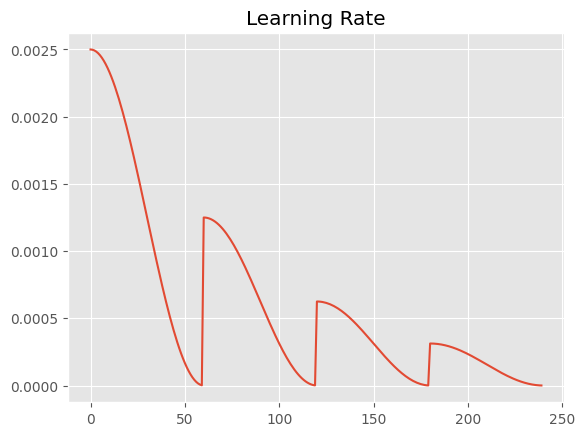

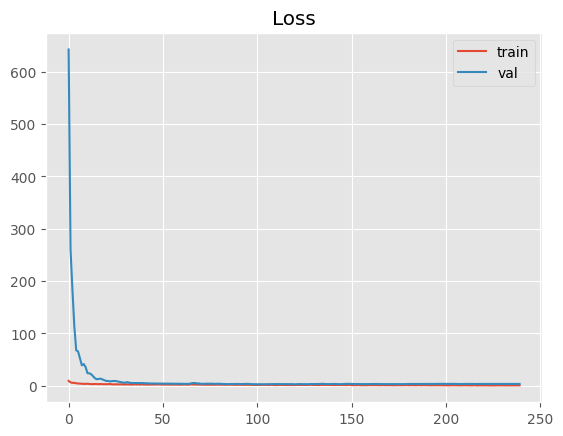

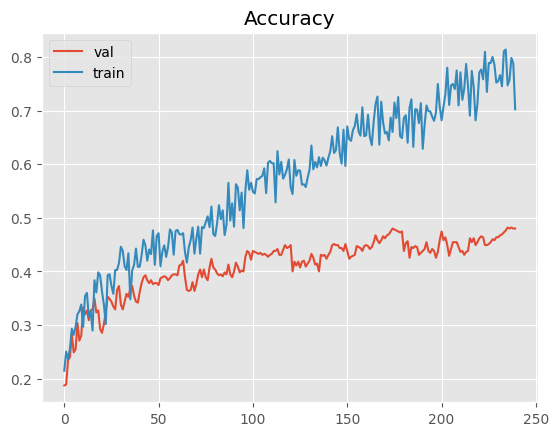

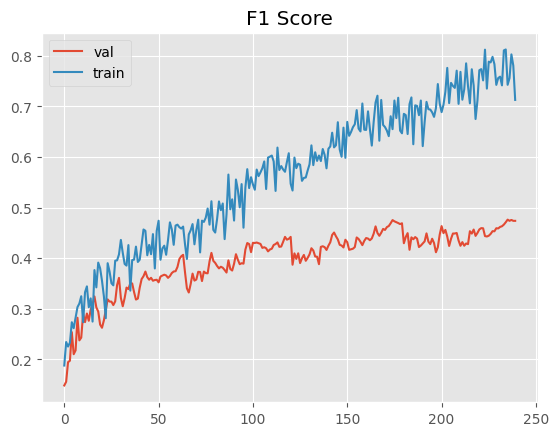

In [55]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
plt.plot([lr(epoch) for epoch in range(n_epochs)])
plt.title('Learning Rate')
plt.show()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.title('Loss')
plt.show()
plt.plot(val_accs, label='val')
plt.plot(train_accs, label='train')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.plot(val_f1, label='val')
plt.plot(train_f1, label='train')
plt.legend()
plt.title('F1 Score')
plt.show()

Loss:3.67e+00 | Acc: 0.47| F1: 0.46|


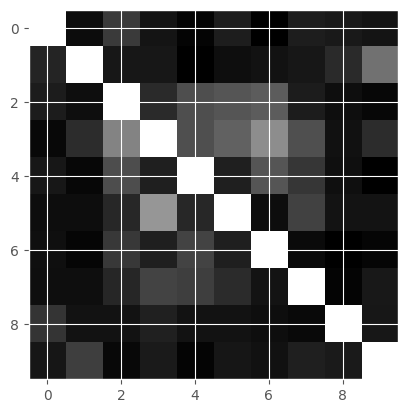

In [56]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
logprobs = best_model._forward(data['X_test'], mode='test')
preds = np.argmax(logprobs, axis=1)
loss = criterion._forward(logprobs, data['Y_test'])

total_loss = np.sum(loss)
confusion = update_confusion_matrix(confusion, preds, data['Y_test'])
acc = np.count_nonzero(preds == data['Y_test']) / data['Y_test'].shape[0]
f1 = f1_score(confusion)
print(f'Loss:{total_loss:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
conf_mat = confusion / np.max(confusion, axis=1, keepdims=True)
plt.imshow(conf_mat, cmap='gray')

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

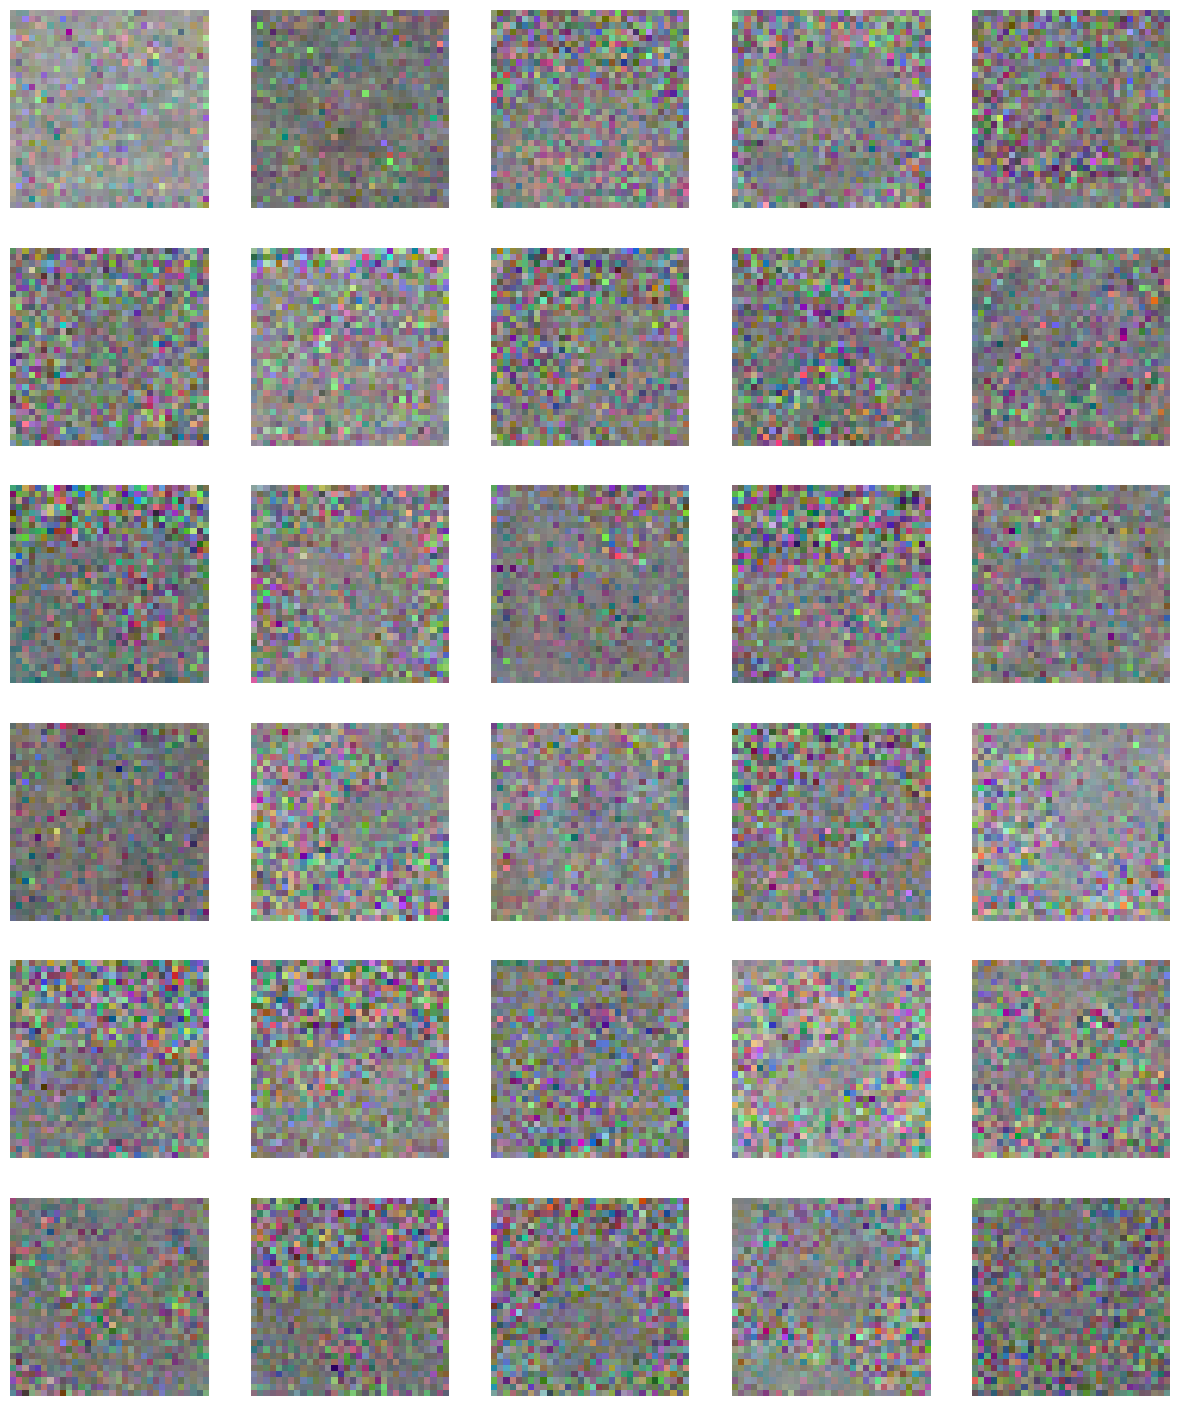

In [57]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 30
weights = best_model.layers[0].params['W'][:n, :]
weights = weights.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).reshape(n, -1)
weights -= np.min(weights, axis=1).reshape(n, 1)
weights /= np.max(weights, axis=1).reshape(n, 1)
weights = weights.reshape(n, 32, 32, 3)
plt.figure(figsize=(15, 18))
for i in range(n):
    plt.subplot(6, 5, i+1)
    plt.imshow(weights[i])
    plt.axis('off')
plt.show()

visualization gets way more meaningful when input layer regularization goes high, set first layer dropout rate to 0.5 and L2 to 1.8 and visualization would become a mixture of classes including cats, dogs and frogs but accuracy goes down to near 40.